# K-Nearest Neighbors (K-NN)

In [1]:
#Importing the libraries

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import pandas.util.testing as tm
import pandas.testing
import seaborn as sns

import warnings
warnings.simplefilter('ignore', FutureWarning)

C:\Users\tejas_naik\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  


In [2]:
#Importing the dataset

dataset = pd.read_csv('Data/clean_df.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values

In [3]:
#Splitting the dataset into the Training set and Test set

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 0)

In [4]:
#Feature Scaling

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

k: 1, Train/Test Score: 1.000/0.823
k: 3, Train/Test Score: 0.910/0.838
k: 5, Train/Test Score: 0.888/0.842
k: 7, Train/Test Score: 0.878/0.849
k: 9, Train/Test Score: 0.873/0.851
k: 11, Train/Test Score: 0.871/0.853
k: 13, Train/Test Score: 0.869/0.853
k: 15, Train/Test Score: 0.867/0.851
k: 17, Train/Test Score: 0.865/0.853
k: 19, Train/Test Score: 0.863/0.854
k: 21, Train/Test Score: 0.861/0.853


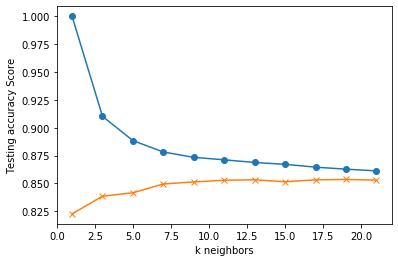

In [5]:
# K classification
# Loop through different k values to see which has the highest accuracy
# Note: We only use odd numbers because we don't want any ties
from sklearn.neighbors import KNeighborsClassifier

train_scores = []
test_scores = []
for k in range(1, 22, 2):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    train_score = knn.score(X_train, y_train)
    test_score = knn.score(X_test, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k: {k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 22, 2), train_scores, marker='o')
plt.plot(range(1, 22, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.savefig('Output/Kplot.png')
plt.show()

In [6]:
#Training the K-NN model on the Training set

from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors = 11, metric = 'minkowski', p = 2)
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=11, p=2,
                     weights='uniform')

In [7]:
# Making the Confusion Matrix

from sklearn.metrics import confusion_matrix, accuracy_score
y_pred = classifier.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
accuracy_score(y_test, y_pred)

[[10400   619]
 [ 1457  1629]]


0.8528181495923431

In [8]:
# model matrics

TP = cm[0,0]
TN = cm[1,1]
FP = cm[0,1]
FN = cm[1,0]

# classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

# classification error

classification_error = (FP + FN) / float(TP + TN + FP + FN)

# precision score

precision = TP / float(TP + FP)

# Recall

recall = TP / float(TP + FN)

# True Positive rate

true_positive_rate = TP / float(TP + FN)

# False Positive rate

false_positive_rate = FP / float(FP + TN)

# Specificity

specificity = TN / (TN + FP)

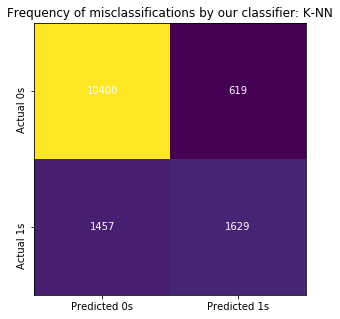

In [9]:

# plotting the Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=('Predicted 0s', 'Predicted 1s'))
ax.yaxis.set(ticks=(0, 1), ticklabels=('Actual 0s', 'Actual 1s'))
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.title('Frequency of misclassifications by our classifier: K-NN')
plt.yticks(rotation='vertical')
plt.savefig('Output/CMKNN.png')
plt.show()

In [10]:
# compare training and test accuracy for overfitting
print(f"Training Data Score: {classifier.score(X_train, y_train)}")
print(f"Testing Data Score: {classifier.score(X_test, y_test)}")
training_accuracy = classifier.score(X_train, y_train)

Training Data Score: 0.8711568001890583
Testing Data Score: 0.8528181495923431


In [11]:

df = pd.DataFrame({"Model Name": "K Nearest Neighbour",
              "Training Accuracy": [training_accuracy],
              "Classification Accuracy":[classification_accuracy],
              "Classification Error":[classification_error],
              "Precision":[precision],
              "Recall":[recall],
              "True Positive Rate":[true_positive_rate],
              "False Positive Rate":[false_positive_rate],
              "Specificity":[specificity]              
             })
df

,Model Name,Training Accuracy,Classification Accuracy,Classification Error,Precision,Recall,True Positive Rate,False Positive Rate,Specificity
0,K Nearest Neighbour,0.871157,0.852818,0.147182,0.943824,0.877119,0.877119,0.275356,0.724644


In [12]:
import os
# if file does not exist write header 
if not os.path.isfile('Data/model.csv'):
    df.to_csv('Data/model.csv', header='column_names')
else: # else it exists so append without writing the header
    df.to_csv('Data/model.csv', mode='a', header=False, index=False)